**Data-Driven Engineering Project: Prediction of a pendulum motion**

**Classification**

Classification of the length works fine with input layer immediately connected to the output and relu connection 10 epochs adam (this was checked with the dataset where only the length was varied an all other parameters are kept constant):

```
% Define constants
g = 9.81;                % acceleration due to gravity [m/s^2]
L = [0.1,0.25,0.5,0.75,1];           % length of pendulum [m]
M = 0.1;              % mass of pendulum [kg]
C = 0.05;     % damping coefficient [kg*m^2/s]
THETA0 = [25]./180*pi;    % initial angle [radians]
OMEGA0 = [0];                     % initial angular velocity [radians/s]
samples = 100;

% Add Guassian noise
mu = 0;
sigma = 0;
```

First we need to import in the datavectors X and Y from the .mat files

In [ ]:
from google.colab import files

# uploaded = files.upload() # upload directly but can take some time

from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)



Mounted at /content/gdrive/


In [ ]:
import scipy.io
import tensorflow as tf
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.integrate import odeint

X_L = scipy.io.loadmat('/content/gdrive/MyDrive/DataDrivenEngineering_Data/X_L.mat')
Y_L = scipy.io.loadmat('/content/gdrive/MyDrive/DataDrivenEngineering_Data/Y_L.mat')
Y_L = Y_L['Y_L'].T        # import the variable named 'Y' from the .mat file
X_L = X_L['X_L'].T

# Transpose to get the samples on the rows and features on columns

print(X_L.shape)
print(Y_L.shape)


(500, 10001)
(500, 5)


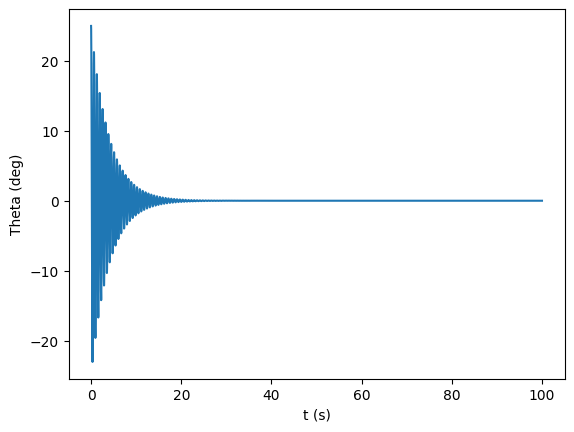

In [ ]:
# Plot one observation with its labels
observation = 20

dt = 0.01  # time step
t_end = 100  # end time in seconds
tspan = np.arange(0, t_end + dt, dt)

plt.plot(tspan,X_L[observation,:]*180/np.pi)
plt.ylabel('Theta (deg)')
plt.xlabel('t (s)')
plt.show()


*Loss functions*:
- Regression

Mean Squared Error (MSE): MSE is the most commonly used loss function for regression tasks. It calculates the average squared difference between the predicted and actual values.

Mean Absolute Error (MAE): MAE calculates the average absolute difference between the predicted and actual values.

Mean Absolute Percentage Error (MAPE): MAPE is similar to MAE but calculates the percentage difference between the predicted and actual values.

Mean Squared Logarithmic Error (MSLE): MSLE calculates the average squared difference between the logarithm of predicted and actual values.

Huber Loss: Huber loss is a combination of MSE and MAE loss. It is less sensitive to outliers than MSE.

Log-Cosh Loss: Log-Cosh loss is also less sensitive to outliers than MSE. It is a smooth approximation of the Huber loss.

Quantile Loss: Quantile loss is used to predict quantiles of the target distribution.

- Classification

(sparse) Cathegorical crossentropy

*Optimizers:* 
['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam','Ftrl','SGD']

*Activation Functions:* ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu','elu', 'exponential', LeakyReLU,'relu']

In [ ]:
# Take the labels of parameter we want for classification
y = Y_L[:,0] # Labels for length: 0.1, 0.25, 0.5, 0.75, 1 -> should vary from 0,1,2,3,4

y_mapped = y

for i in range(0,len(y_mapped)):
  if y[i] == 0.1:
    y_mapped[i] = 0
  elif y[i] == 0.25:
    y_mapped[i] = 1
  elif y[i] == 0.5:
    y_mapped[i] = 2
  elif y[i] == 0.75:
    y_mapped[i] = 3
  elif y[i] == 1:
    y_mapped[i] = 4
y_mapped = y_mapped.astype(int)

# Split the data into train and test sets and permutates randomly
X_train, X_test, y_train, y_test = train_test_split(X_L, y_mapped, test_size=0.2, random_state=5)

print(y_train[0:10])

# Scale the train and test parts
scaler = StandardScaler()
X0_train = scaler.fit_transform(X_train)
X0_test = scaler.transform(X_test)

# scaling and spliting cannot be interchanged because by scaling you use all of the data that you input, 
# such that you insert some knowledge of the test data!

[2 3 1 4 1 0 0 2 3 3]


In [ ]:
# Build a linear neural network using the tensorflow sequential model
# https://www.tensorflow.org/guide/keras/sequential_model

output_shape = 5 # 5 possible values for the length
input_shape = (X_train.shape[1],)

# Fully-connected neural network
model = tf.keras.Sequential([
    # Let's start with input directly connected to output
    tf.keras.layers.Dense(output_shape, input_shape=input_shape, activation='linear')

    # # Let's try adding 1 hidden layer 
    # tf.keras.layers.Dense(64,input_shape=input_shape, name='Hidden1',activation = 'relu'), # First hidden Layer
    # tf.keras.layers.Dense(output_shape, name ='Output',activation='linear')

    # # Let's try adding 2 hidden layers
    # tf.keras.layers.Dense(128,input_shape=input_shape, name='Hidden1',activation = 'relu'), # First hidden Layer
    # tf.keras.layers.Dense(8, activation="relu", name="Hidden2"), # Second hidden Layer
    # tf.keras.layers.Dense(output_shape, name ='Output',activation='linear')
    
])

model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 50010     
                                                                 
Total params: 50,010
Trainable params: 50,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fully-connected neural network with input directly connected to output
output_shape = 5 # 5 possible values for the length
input_shape = (X_train.shape[1],)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_shape, input_shape=input_shape, activation='linear')    
])

model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 5)                 50010     
                                                                 
Total params: 50,010
Trainable params: 50,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X0_train, y_train, 
                    epochs=10, 
                    validation_data=(X0_test, y_test))

Epoch 1/10
13/13 [==============================] - 1s 28ms/step - loss: 0.0934 - accuracy: 0.9700 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
13/13 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
13/13 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
13/13 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
13/13 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
13/13 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss

4/4 - 0s - loss: 1.1900 - accuracy: 1.0000 - 32ms/epoch - 8ms/step
test loss: 1.1900273561477661
test accuracy: 1.0


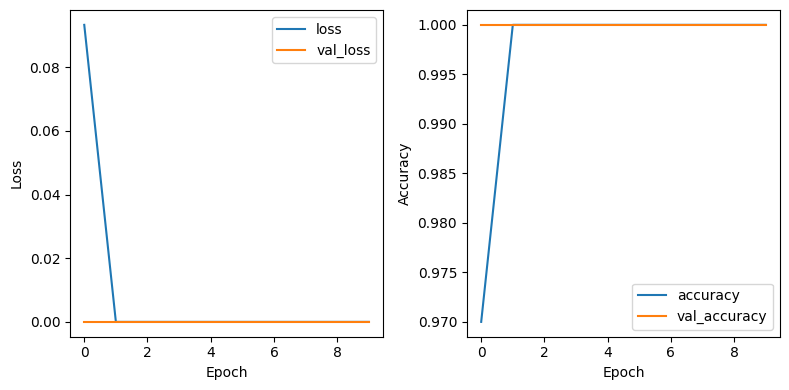

In [ ]:
# We can check the training history
# when the loss doesn't change anymore -> model has reached maximum accuracy
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('test loss:', test_loss)
print('test accuracy:', test_acc)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(history.history['loss'], label='loss')
axs[0].plot(history.history['val_loss'], label = 'val_loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(history.history['accuracy'], label='accuracy')
axs[1].plot(history.history['val_accuracy'], label = 'val_accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

fig.tight_layout()
plt.show()

# graphs very important when training, loss can go down and val_loss can stay same
# model is getting overfit 
# select number of epochs on validation loss !!!

In [ ]:
# save the figure as an EPS file
fig.savefig('trainingHistory_XL1.eps', format='eps')
# download the figure to your local machine
from google.colab import files
files.download('trainingHistory_XL1.eps')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

4/4 [==============================] - 0s 3ms/step


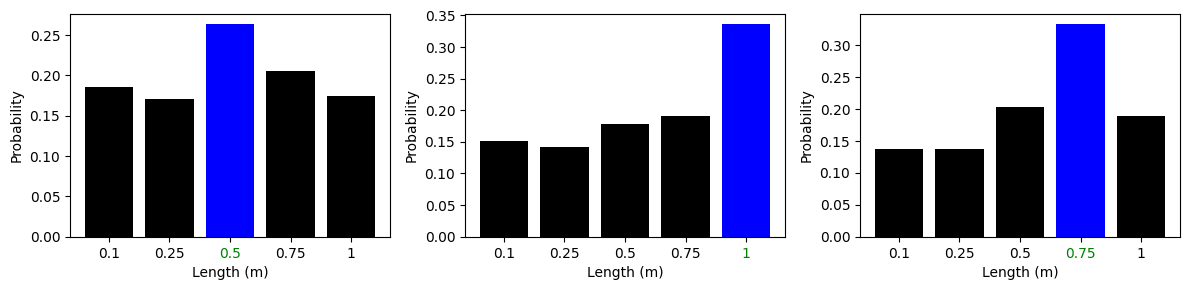

From the 100 samples is 100.0% guessed correctly!


ValueError: ignored

In [ ]:
# Add the softmax layer
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test) # predictions = (n_samples x n_features) with probability of prediction

index = 1

# print(predictions.shape)
# print(predictions[index],y_test[index])

def plot_pred(ax,i, predictions_array, true_label): # i = index of prediction
  if np.argmax(predictions_array[i,:]) == 0:
    colors=['blue','black','black','black','black']
  elif np.argmax(predictions_array[i,:]) == 1:
    colors=['black','blue','black','black','black']
  elif np.argmax(predictions_array[i,:]) == 2:
    colors=['black','black','blue','black','black']
  elif np.argmax(predictions_array[i,:]) == 3:
    colors=['black','black','black','blue','black']
  elif np.argmax(predictions_array[i,:]) == 4:
    colors=['black','black','black','black','blue']
  
  labels = ['0.1', '0.25', '0.5', '0.75', '1']
  ax.bar(labels, predictions_array[i,:],color=colors)
  ax.get_xticklabels()[true_label[i]].set_color('green')
  ax.set_xlabel('Length (m)')
  ax.set_ylabel('Probability')

  # print('The true label is: ',true_label[i])
  # print('The predicted label is :',np.argmax(predictions_array[i,:]))

# Making subplots
n_rows = 1
n_cols = 3

random_integers = np.random.randint(0, len(y_test), size=n_cols*n_rows)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(12,3))  # create the subplots

for i, ax in enumerate(axs.flat):  # iterate over the subplots
  plot_pred(ax, random_integers[i], predictions, y_test)

plt.tight_layout()  # adjust the spacing between subplots
plt.show()

# Check how many were predicted wrong
idx_wrong = []
idx_right = []
for i in range(len(y_test)):
  if np.argmax(predictions[i,:]) == y_test[i]:
    idx_right.append(i)
  else:
    idx_wrong.append(i)
idx_wrong = np.array(idx_wrong)
idx_right = np.array(idx_right)
print(f'From the {len(y_test)} samples is {100*len(idx_right)/(len(idx_right)+len(idx_wrong))}% guessed correctly!')

# Plot a wrong sample
plot_pred(idx_wrong[int(np.random.randint(0, len(idx_wrong), size=1))],predictions,y_test)


In [ ]:
# save the figure as an EPS file
fig.savefig('results_XL1.eps', format='eps')
# download the figure to your local machine
from google.colab import files
files.download('results_XL1.eps')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>